In [84]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
from sklearn.linear_model import LinearRegression 

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=0.8)

In [3]:
mydata = pd.read_csv('/Users/hakangurler/Desktop/train_bike.csv', parse_dates=True, index_col='datetime')
testdata = pd.read_csv('/Users/hakangurler/Desktop/test_bike.csv', parse_dates=True, index_col='datetime')

In [4]:
print('Shape of data: ', mydata.shape) 

Shape of data:  (10886, 11)


In [5]:
mydata.head(3) 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [6]:
mydata.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [7]:
print(mydata.index[[0, -1]]) 

DatetimeIndex(['2011-01-01 00:00:00', '2012-12-19 23:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)


In [8]:
category_list = ['season', 'holiday', 'workingday', 'weather']
for var in category_list:
    mydata[var] = mydata[var].astype('category')
    testdata[var] = testdata[var].astype('category') 

In [9]:
season_dict = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weather_dict = {1:'Clear', 2:'Misty+Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain'}
mydata['season'] = mydata['season'].map(season_dict)
mydata['weather'] = mydata['weather'].map(weather_dict)

testdata['season'] = testdata['season'].map(season_dict)
testdata['weather'] = testdata['weather'].map(weather_dict)

mydata.head(n=3) 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32


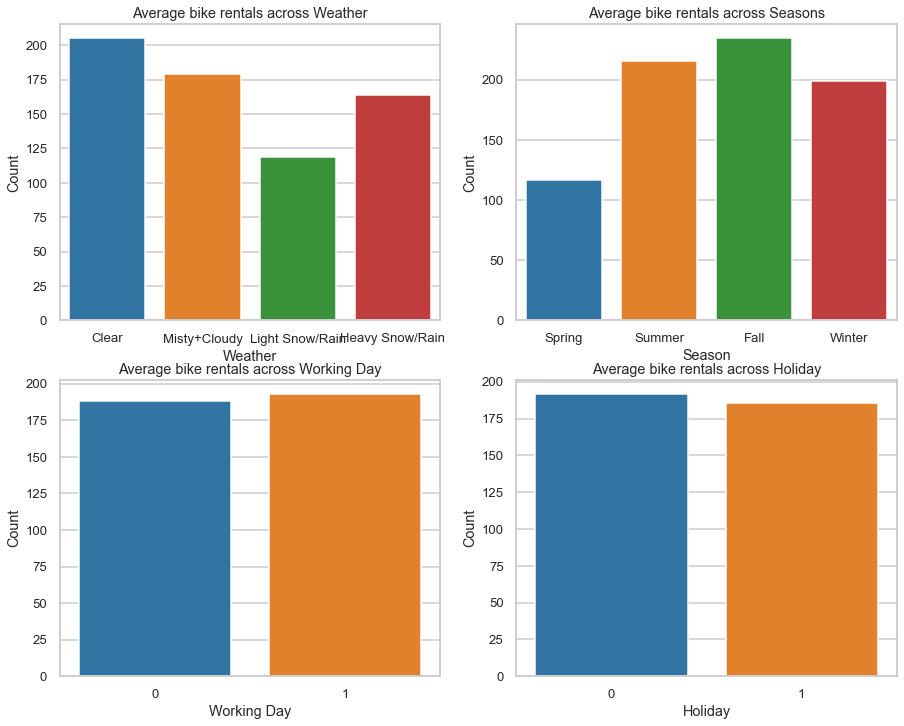

In [10]:
fig = plt.figure(figsize=(15, 12))
axes = fig.add_subplot(2, 2, 1)
group_weather = pd.DataFrame(mydata.groupby(['weather'])['count'].mean()).reset_index()
sns.barplot(data=group_weather, x='weather', y='count', ax=axes)
axes.set(xlabel='Weather', ylabel='Count', title='Average bike rentals across Weather')

axes = fig.add_subplot(2, 2, 2)
group_season = pd.DataFrame(mydata.groupby(['season'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='season', y='count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Average bike rentals across Seasons')

axes = fig.add_subplot(2, 2, 3)
group_workingday = pd.DataFrame(mydata.groupby(['workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='workingday', y='count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Average bike rentals across Working Day')

axes = fig.add_subplot(2, 2, 4)
group_season = pd.DataFrame(mydata.groupby(['holiday'])['count'].mean()).reset_index()
sns.barplot(data=group_season, x='holiday', y='count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Average bike rentals across Holiday')
plt.show() 

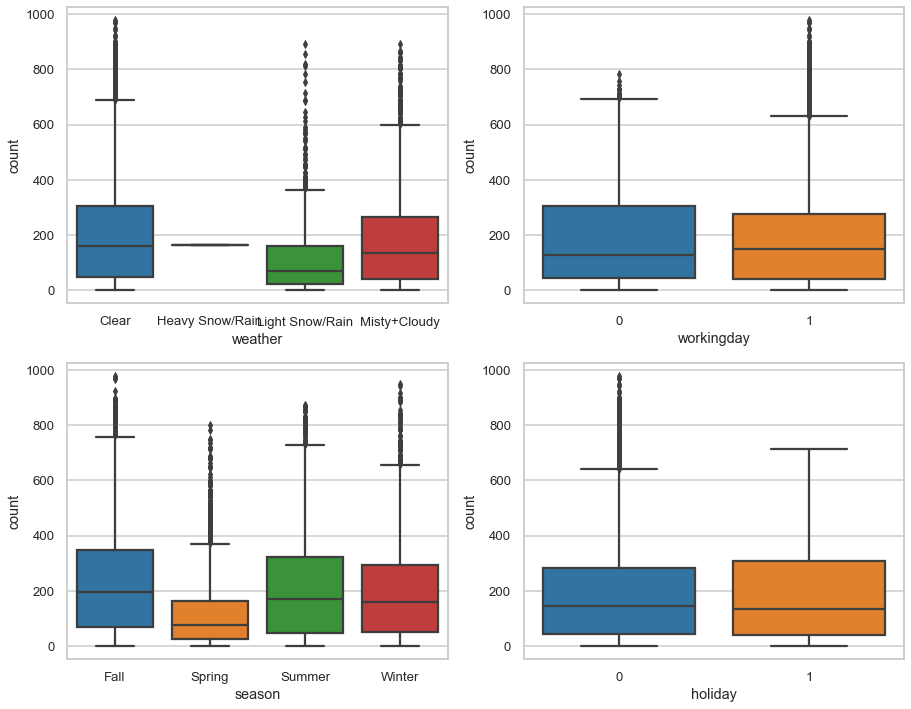

In [11]:
f, axes = plt.subplots(2, 2, figsize=(15, 12))
hue_order= ['Clear', 'Heavy Snow/Rain', 'Light Snow/Rain', 'Misty+Cloudy']
sns.boxplot(data=mydata, y='count', x='weather', ax=axes[0][0], order=hue_order)
sns.boxplot(data=mydata, y='count', x='workingday', ax=axes[0][1])
hue_order= ['Fall', 'Spring', 'Summer', 'Winter']
sns.boxplot(data=mydata, y='count', x='season', ax=axes[1][0], order=hue_order)
sns.boxplot(data=mydata, y='count', x='holiday', ax=axes[1][1])

plt.show() 

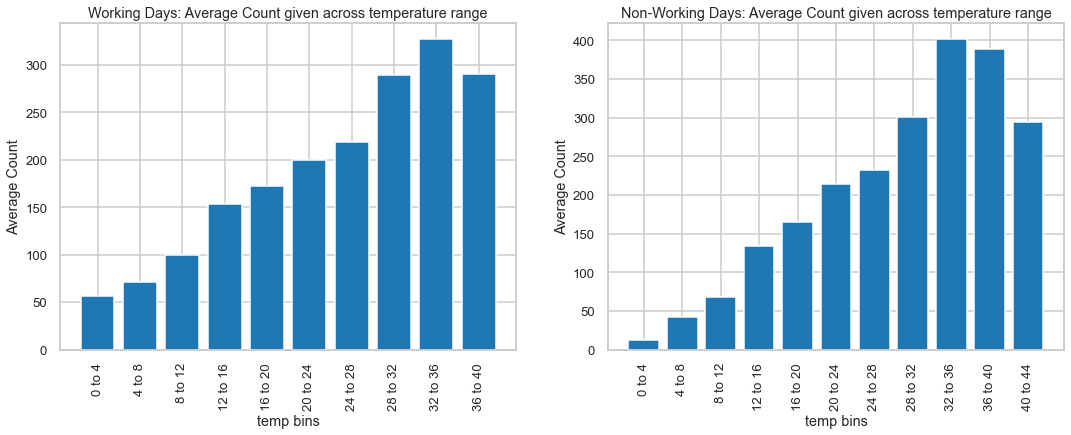

In [12]:
mydata_w = mydata[mydata.workingday==1]
mydata_nw = mydata[mydata.workingday==0]

bin_size = 4
mydata_w['temp_round'] = mydata_w['temp']//bin_size
mydata_nw['temp_round'] = mydata_nw['temp']//bin_size

mean_count_vs_temp_w = mydata_w.groupby('temp_round')['count'].mean()
mean_count_vs_temp_nw = mydata_nw.groupby('temp_round')['count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_w))]
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nw))]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')

plt.show() 

<AxesSubplot:>

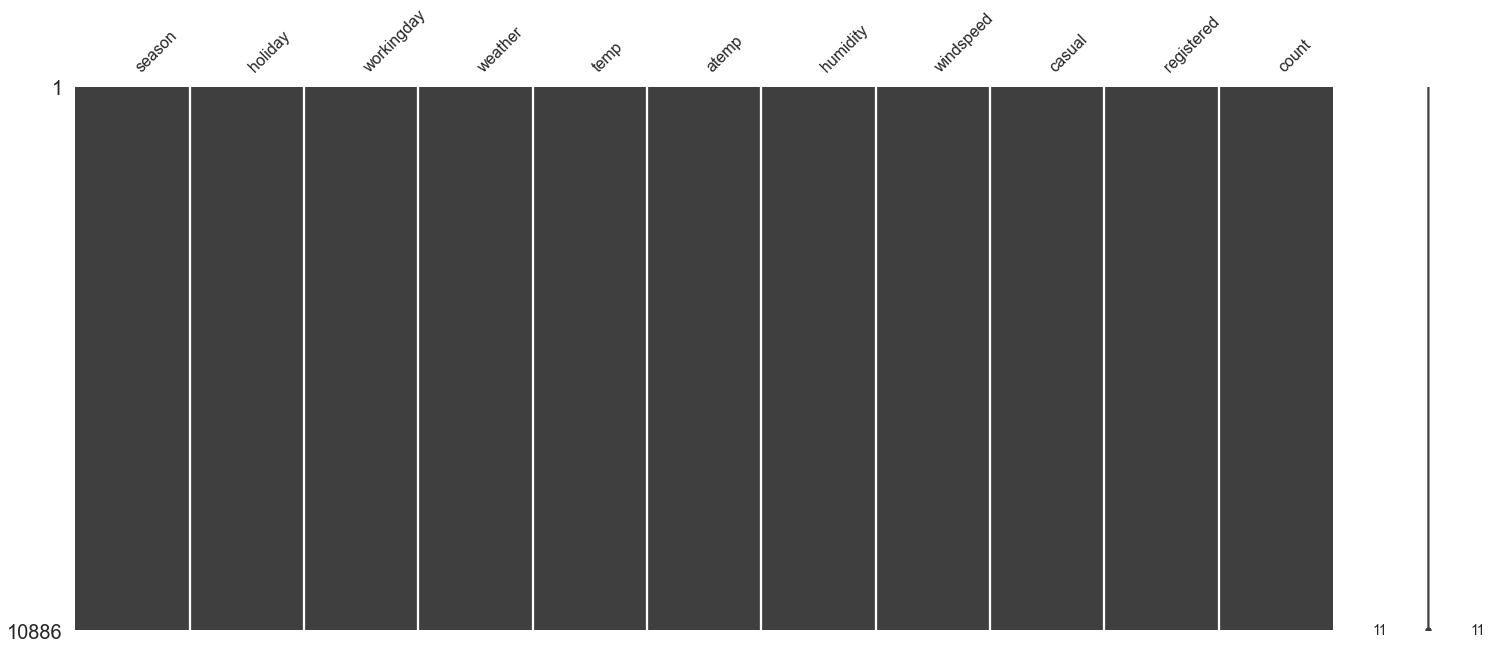

In [13]:
msno.matrix(mydata) 

In [14]:
mydata['month'] = [x.month for x in mydata.index]
mydata['date'] = [x.day for x in mydata.index]
mydata['hour'] = [x.hour for x in mydata.index]
mydata['day'] = [x.weekday() for x in mydata.index]

testdata['month'] = [x.month for x in testdata.index]
testdata['date'] = [x.day for x in testdata.index]
testdata['hour'] = [x.hour for x in testdata.index]
testdata['day'] = [x.weekday() for x in testdata.index]

category_list = ['month', 'date', 'hour', 'day']
for var in category_list:
    mydata[var] = mydata[var].astype('category')
    testdata[var] = testdata[var].astype('category') 

In [15]:
day_dict = {0:'Monday', 1:'Teusday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
mydata['day'] = mydata['day'].map(day_dict)
testdata['day'] = testdata['day'].map(day_dict)

mydata.head(n=3) 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,1,2,Saturday


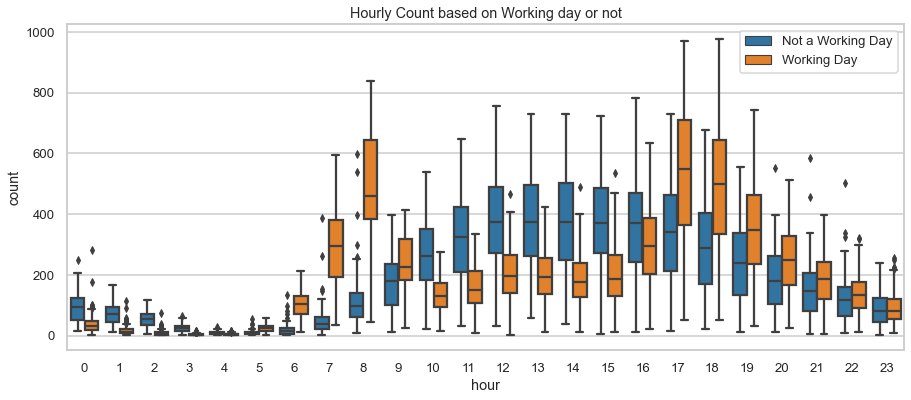

In [16]:
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=mydata, y='count', x='hour', hue='workingday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(title='Hourly Count based on Working day or not')

plt.show() 

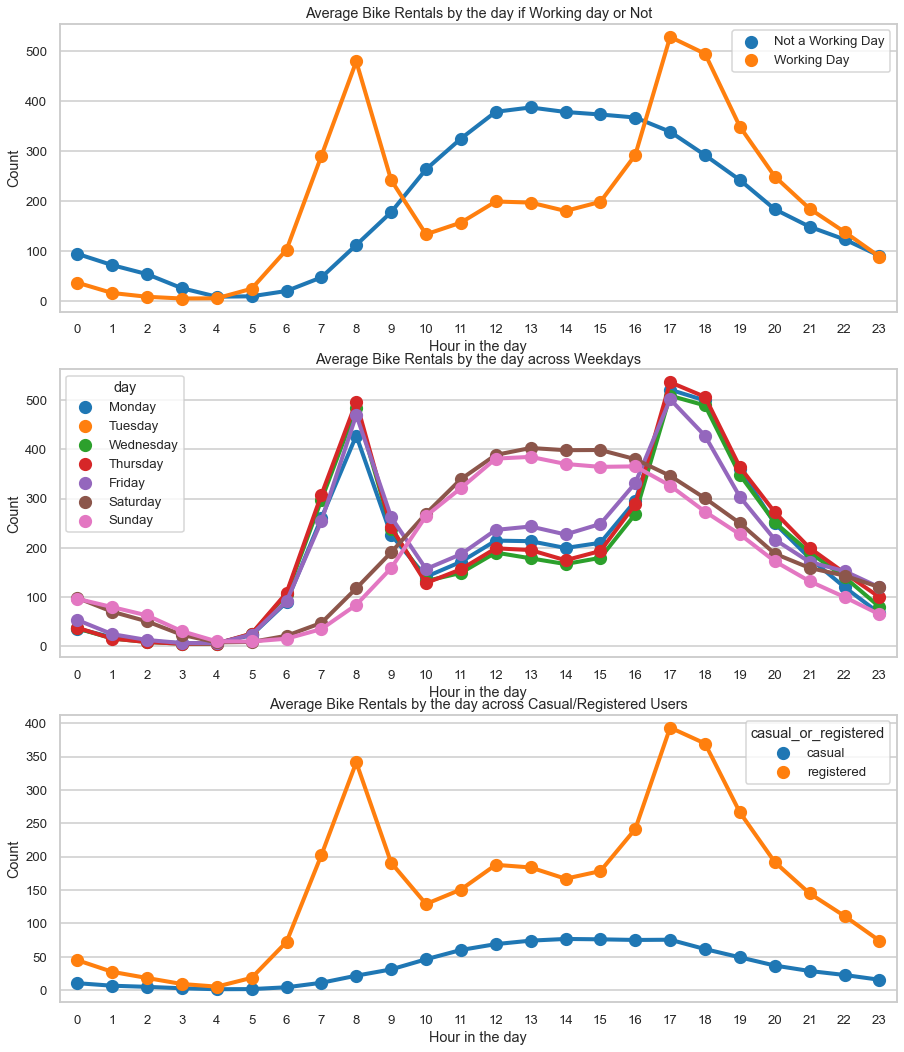

In [17]:
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(mydata.groupby(['workingday', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='count', hue='workingday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(mydata.groupby(['day', 'hour'])['count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='count', hue='day', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')

df_melt = pd.melt(frame=mydata, id_vars='hour', value_vars=['casual', 'registered'], value_name='count', var_name='casual_or_registered')
group_casual_hour = pd.DataFrame(df_melt.groupby(['hour', 'casual_or_registered'])['count'].mean()).reset_index()
sns.pointplot(data=group_casual_hour, x='hour', y='count', hue='casual_or_registered', ax=axes[2])
axes[2].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Casual/Registered Users')

plt.show() 

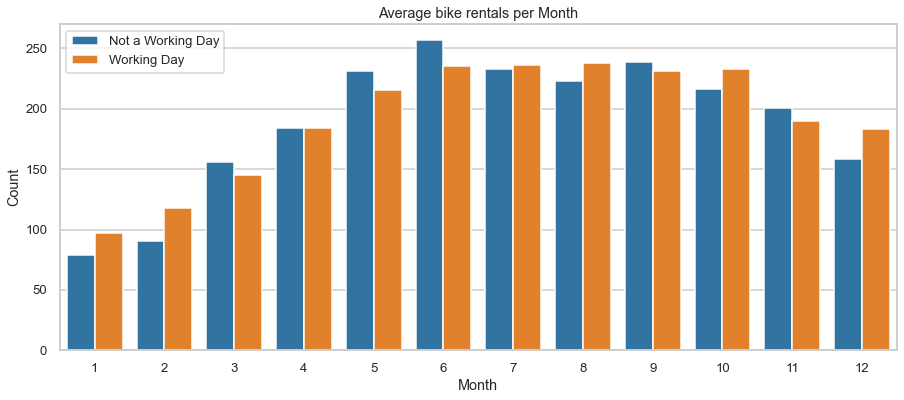

In [18]:
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
group_month = pd.DataFrame(mydata.groupby(['month', 'workingday'])['count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='count', hue='workingday', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike rentals per Month')
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show() 

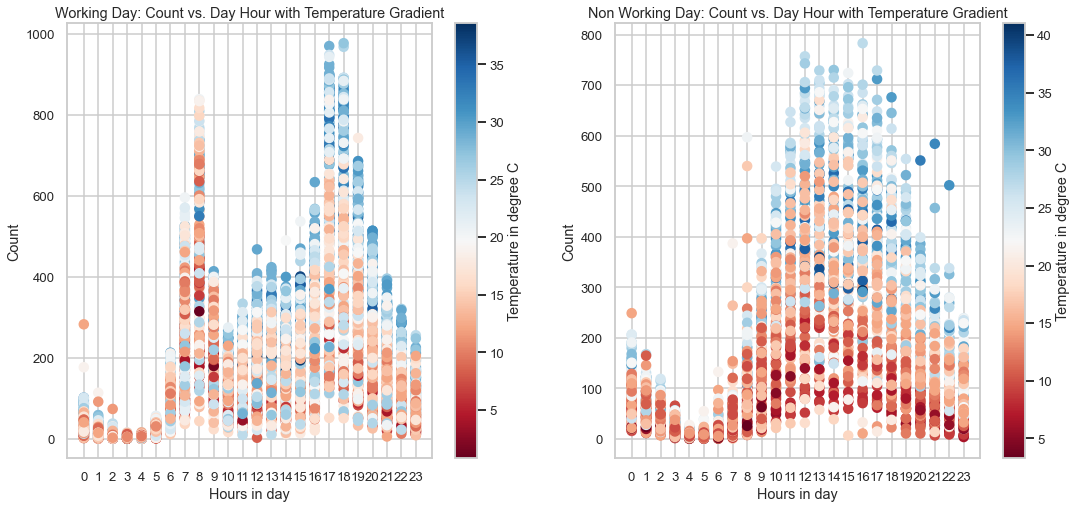

In [20]:
mydata_w = mydata[mydata.workingday==1]
mydata_nw = mydata[mydata.workingday==0]

fig = plt.figure(figsize=(18, 8))
# Working Day
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(mydata_w.hour, mydata_w['count'], c=mydata_w.temp, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Count', title='Working Day: Count vs. Day Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# Non Working Day
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(mydata_nw.hour, mydata_nw['count'], c=mydata_nw.temp, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Count', title='Non Working Day: Count vs. Day Hour with Temperature Gradient')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

plt.show()


In [104]:
heavy_weather_data = mydata.loc[mydata['weather']=='Heavy Snow/Rain', :]
print(heavy_weather_data.index)
mydata['2012-01-09 08:00' : '2012-01-09 20:00'] 

DatetimeIndex(['2012-01-09 18:00:00'], dtype='datetime64[ns]', name='datetime', freq=None)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2012-01-09 08:00:00,Spring,0,1,Misty+Cloudy,9.02,12.880,55,6.0032,13,407,420,1,9,8,Monday
2012-01-09 09:00:00,Spring,0,1,Misty+Cloudy,9.02,13.635,64,0.0000,9,188,197,1,9,9,Monday
2012-01-09 10:00:00,Spring,0,1,Clear,9.84,14.395,60,0.0000,13,95,108,1,9,10,Monday
2012-01-09 11:00:00,Spring,0,1,Misty+Cloudy,10.66,14.395,56,6.0032,6,82,88,1,9,11,Monday
2012-01-09 12:00:00,Spring,0,1,Misty+Cloudy,10.66,13.635,56,7.0015,10,93,103,1,9,12,Monday
2012-01-09 13:00:00,Spring,0,1,Misty+Cloudy,10.66,13.635,56,7.0015,3,77,80,1,9,13,Monday
2012-01-09 14:00:00,Spring,0,1,Light Snow/Rain,9.02,11.365,75,11.0014,5,45,50,1,9,14,Monday
2012-01-09 15:00:00,Spring,0,1,Light Snow/Rain,9.02,11.365,75,11.0014,5,64,69,1,9,15,Monday
2012-01-09 16:00:00,Spring,0,1,Light Snow/Rain,9.02,12.880,87,6.0032,3,46,49,1,9,16,Monday


In [105]:
mydata.loc[mydata['weather']=='Heavy Snow/Rain', 'weather'] = 'Light Snow/Rain'
testdata.loc[testdata['weather']=='Heavy Snow/Rain', 'weather'] = 'Light Snow/Rain'

mydata['2012-01-09 18:00' : '2012-01-09 18:00'] 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2012-01-09 18:00:00,Spring,0,1,Light Snow/Rain,8.2,11.365,86,6.0032,6,158,164,1,9,18,Monday


In [ ]:
# z-score: z-score (standard score) gives you an idea of how far from the mean a data point is. 

# it’s a measure of how many standard deviations below or above the population mean a raw score is.

# A z-score can be placed on a normal distribution curve. 

# Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) 
# up to +3 standard deviations (which would fall to the far right of the normal distribution curve). 

# In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

In [107]:
def zscore(series): 
    return (series-series.mean())/series.std()

mydata['count_zscore'] = mydata.groupby(['hour', 'workingday'])['count'].transform(zscore)
outlier_idx = np.abs(mydata['count_zscore'])>4
outlier_data = mydata.loc[outlier_idx, :]
print('Shape of the outlier data entries: ', outlier_data.shape)
outlier_data 

Shape of the outlier data entries:  (15, 16)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day,count_zscore
datetime,,,,,,,,,,,,,,,,
2011-05-02 00:00:00,Summer,0,1,Clear,18.86,22.725,72,8.9981,68,109,177,5,2,0,Monday,5.328782
2011-05-02 01:00:00,Summer,0,1,Clear,18.86,22.725,72,8.9981,41,73,114,5,2,1,Monday,7.899886
2011-07-15 02:00:00,Fall,0,1,Clear,24.60,28.790,78,11.0014,16,22,38,7,15,2,Friday,4.248737
2012-04-01 06:00:00,Summer,0,0,Misty+Cloudy,14.76,17.425,76,8.9981,9,88,97,4,1,6,Sunday,4.227851
2012-04-16 06:00:00,Summer,1,0,Clear,21.32,25.000,83,11.0014,10,123,133,4,16,6,Monday,6.204331
2012-04-16 07:00:00,Summer,1,0,Clear,21.32,25.000,83,8.9981,20,367,387,4,16,7,Monday,7.784914
2012-04-16 08:00:00,Summer,1,0,Misty+Cloudy,22.96,26.515,83,11.0014,48,549,597,4,16,8,Monday,5.864166
2012-07-04 21:00:00,Fall,1,0,Clear,34.44,40.150,53,8.9981,222,362,584,7,4,21,Wednesday,4.970624
2012-07-04 22:00:00,Fall,1,0,Clear,33.62,39.395,56,15.0013,175,327,502,7,4,22,Wednesday,5.022732


In [108]:
mydata_without_outliers = mydata.loc[~outlier_idx, :]
print('Shape of data before outliner pruning: ', mydata.shape)
print('Shape of data after outlier pruning: ', mydata_without_outliers.shape) 

Shape of data before outliner pruning:  (10886, 16)
Shape of data after outlier pruning:  (10871, 16)


In [109]:
mydata_without_outliers = mydata_without_outliers.drop('count_zscore', axis=1)
mydata_without_outliers.head(n=3) 

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,date,hour,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,1,1,2,Saturday


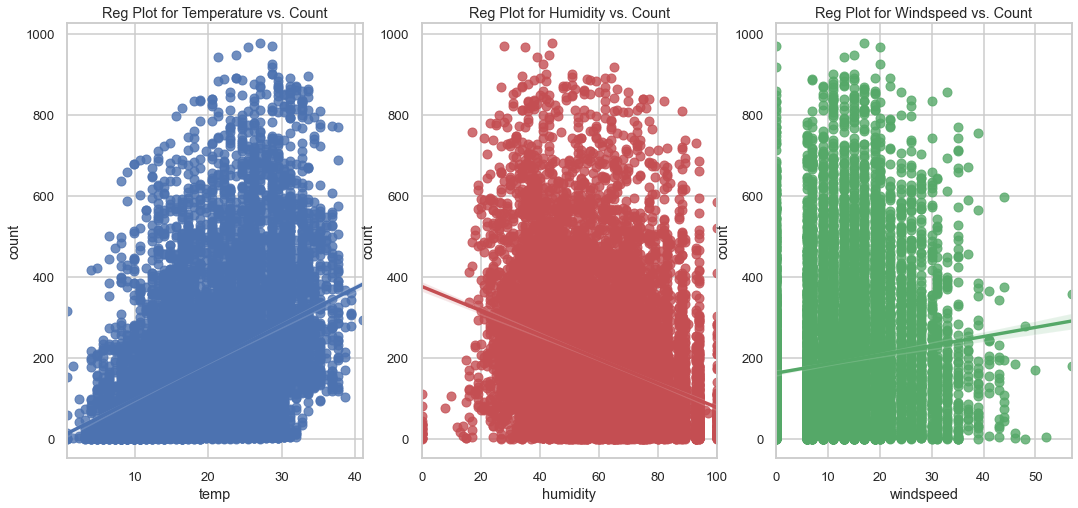

In [110]:
fig = plt.figure(figsize=(18, 8))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=mydata_without_outliers, x='temp', y='count',ax=axes)
axes.set(title='Reg Plot for Temperature vs. Count')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=mydata_without_outliers, x='humidity', y='count',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. Count')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=mydata_without_outliers, x='windspeed', y='count',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. Count')
plt.show() 

In [ ]:
# a positive correlation of count with temperature and windspeed and a negative correlation with humidity (ABOVE)

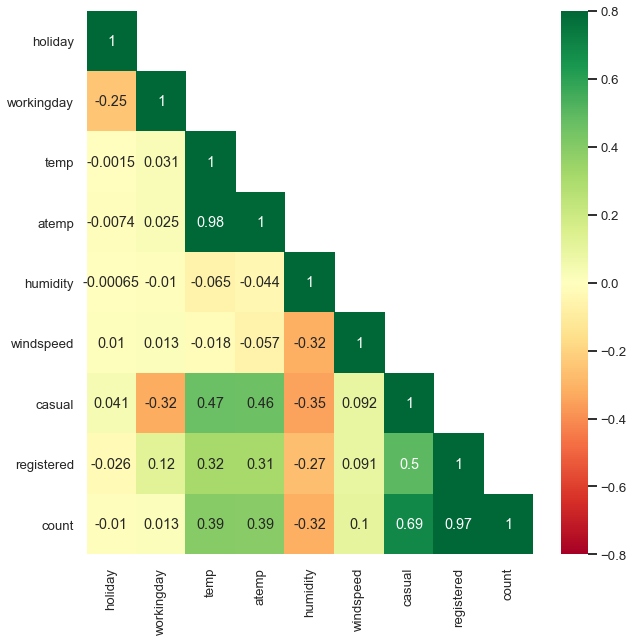

In [111]:
corr_matrix = mydata_without_outliers.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show() 

In [112]:
season_inv_dict = {'Spring':1, 'Summer':2, 'Fall':3, 'Winter':4}
weather_inv_dict = {'Clear':1, 'Misty+Cloudy':2, 'Light Snow/Rain':3, 'Heavy Snow/Rain':4}
day_inv_dict = {'Monday':0, 'Teusday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

mydata_without_outliers['season'] = mydata_without_outliers['season'].map(season_inv_dict)
mydata_without_outliers['weather'] = mydata_without_outliers['weather'].map(weather_inv_dict)
mydata_without_outliers['day'] = mydata_without_outliers['day'].map(day_inv_dict)

testdata['season'] = testdata['season'].map(season_inv_dict)
testdata['weather'] = testdata['weather'].map(weather_inv_dict)
testdata['day'] = testdata['day'].map(day_inv_dict)


drop_columns_1 = ['season', 'holiday', 'atemp', 'windspeed', 'date', 'day']
mydata_without_outliers = mydata_without_outliers.drop(drop_columns_1, axis=1)
testdata = testdata.drop(drop_columns_1, axis=1)
mydata_without_outliers.head(n=3) 

,workingday,weather,temp,humidity,casual,registered,count,month,hour
datetime,,,,,,,,,
2011-01-01 00:00:00,0,1,9.84,81,3,13,16,1,0
2011-01-01 01:00:00,0,1,9.02,80,8,32,40,1,1
2011-01-01 02:00:00,0,1,9.02,80,5,27,32,1,2


In [113]:
month=pd.get_dummies(mydata_without_outliers['month'], prefix='month')
weather=pd.get_dummies(mydata_without_outliers['weather'], prefix='weather')
hour=pd.get_dummies(mydata_without_outliers['hour'], prefix='hour')
mydata_train=pd.concat([mydata_without_outliers, weather, month, hour],axis=1)

month=pd.get_dummies(testdata['month'], prefix='month')
weather=pd.get_dummies(testdata['weather'], prefix='weather')
hour=pd.get_dummies(testdata['hour'], prefix='hour')
mydata_test=pd.concat([testdata, weather, month, hour],axis=1)

mydata_train.columns 

Index(['workingday', 'weather', 'temp', 'humidity', 'casual', 'registered',
       'count', 'month', 'hour', 'weather_1', 'weather_2', 'weather_3',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'],
      dtype='object')

In [114]:
model_train, model_test = mydata_train[mydata_train.index.day<15], mydata_train[mydata_train.index.day>=15]
model_train2, model_test2 = mydata_without_outliers[mydata_without_outliers.index.day<15], mydata_without_outliers[mydata_without_outliers.index.day>=15]

# Separating out the working an non-working data from the training set 
model_train_w = model_train[model_train['workingday']==1]
model_train_nw = model_train[model_train['workingday']==0]
model_train2_w = model_train2[model_train2['workingday']==1]
model_train2_nw = model_train2[model_train2['workingday']==0]

model_test_w = model_test[model_test['workingday']==1]
model_test_nw = model_test[model_test['workingday']==0]
model_test2_w = model_test2[model_test2['workingday']==1]
model_test2_nw = model_test2[model_test2['workingday']==0]

# Dropping workingday column 
model_train_w = model_train_w.drop('workingday', axis=1)
model_train_nw = model_train_nw.drop('workingday', axis=1)
model_train2_w = model_train2_w.drop('workingday', axis=1)
model_train2_nw = model_train2_nw.drop('workingday', axis=1)

model_test_w = model_test_w.drop('workingday', axis=1)
model_test_nw = model_test_nw.drop('workingday', axis=1)
model_test2_w = model_test2_w.drop('workingday', axis=1)
model_test2_nw = model_test2_nw.drop('workingday', axis=1) 

In [115]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X, X_w, X_nw = model_train.drop('count', axis=1), model_train_w.drop('count', axis=1), model_train_nw.drop('count', axis=1)
y, y_w, y_nw = model_train['count'], model_train_w['count'], model_train_nw['count']
logy, logy_w, logy_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

Xtest, Xtest_w, Xtest_nw = model_test.drop('count', axis=1), model_test_w.drop('count', axis=1), model_test_nw.drop('count', axis=1)
ytest, ytest_w, ytest_nw = model_test['count'], model_test_w['count'], model_test_nw['count']
logytest, logytest_w, logytest_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

# Contains Categorical features instead of the Binary Vector Form
X2, X2_w, X2_nw = model_train2.drop('count', axis=1), model_train2_w.drop('count', axis=1), model_train2_nw.drop('count', axis=1)
y2, y2_w, y2_nw = model_train2['count'], model_train2_w['count'], model_train2_nw['count']
logy2, logy2_w, logy2_nw = np.log1p(y2), np.log1p(y2_w), np.log1p(y2_nw)

Xtest2, Xtest2_w, Xtest2_nw = model_test2.drop('count', axis=1), model_test2_w.drop('count', axis=1), model_test2_nw.drop('count', axis=1)
ytest2, ytest2_w, ytest2_nw = model_test2['count'], model_test2_w['count'], model_test2_nw['count']
logytest2, logytest2_w, logytest2_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

# Data Frame to store all the RMSLE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSLE (Working Day)'] = None
algo_score['Train RMSLE (Non Working Day)'] = None
algo_score['Train RMSLE (Average)'] = None
algo_score['Test RMSLE (Working Day)'] = None
algo_score['Test RMSLE (Non Working Day)'] = None
algo_score['Test RMSLE (Average)'] = None
algo_score['Validation RMSLE (Working Day)'] = None
algo_score['Validation RMSLE (Non Working Day)'] = None
algo_score['Validation RMSLE (Average)'] = None
algo_score['Hyperparameters-Working'] = None
algo_score['Hyperparameters-Non Working'] = None
algo_score['Training+Test Time (sec)'] = None
cv_time = []

# Data Frame for second level of prediction. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X.index)
ypred_test = pd.DataFrame(index = Xtest.index)
ypred_train['count'], ypred_test['count'] = y, ytest 

In [116]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Log Error)
def rmsle(y_actual, y_pred):
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# RMSLE function with inputs in log form. Used for CrossValidation scoring
def rmsle_log(logy_actual, logy_pred):
    calc = (logy_actual - logy_pred) ** 2
    return np.sqrt(np.mean(calc))
rmsle_cv = make_scorer(rmsle_log, greater_is_better=False) 

In [117]:
def plot_true_vs_pred (y_w_actual, y_nw_actual, y_w_pred, y_nw_pred, algo, t_from, t_to):
    fig = plt.figure(figsize=(18, 16))
    
    # Working day plot
    axes = fig.add_subplot(2, 1, 1)
    axes.plot(y_w_actual[t_from:t_to], label='Actual', marker='.', markersize=15)
    axes.plot(y_w_pred[t_from:t_to], label='Predicted', marker='.', markersize=15)
    axes.set(xlabel='Time', ylabel='Count', title='{0} Model for Working Day: Count between time {1} and {2}'.format(algo, t_from, t_to))
    axes.legend()

    # Non working day plot
    axes = fig.add_subplot(2, 1, 2)
    axes.plot(y_nw_actual[t_from:t_to], label='Actual', marker='.', markersize=15)
    axes.plot(y_nw_pred[t_from:t_to], label='Predicted', marker='.', markersize=15)
    axes.set(xlabel='Time', ylabel='Count', title='{0} Model for Non Working Day: Count between time {1} and {2}'.format(algo, t_from, t_to))
    axes.legend()
    plt.show() 

In [118]:
def model_fit (model_w, X_tr_w, X_t_w, y_tr_w, y_t_w, model_nw=None, X_tr_nw=None, X_t_nw=None, y_tr_nw=None, y_t_nw=None):
    ''' Case 1: If separate models for Working day and non-working day
    model_w, model_nw = Models for Working and non-working days, respectively
    X_tr_w, y_tr_w = Training data set for Working days
    X_t_w, y_t_w = Testing data set for Working days
    X_tr_nw, y_tr_nw = Training data set for Non Working days
    X_t_nw, y_t_nw = Testing data set for Non Working days 
    
    Case 2: If single model for working day and non-working day 
    model_w = Single Model for Working and non-working days
    X_tr_w, y_tr_w = Training data set containing both Working and non-working days (feature list must contain 'workingday')
    X_t_w, y_t_w = Testing data set containing both Working and non-working days'''
    
    # Working Day Modeling of Single Model for Working and Non-Working Day
    model_w.fit(X_tr_w, np.log1p(y_tr_w))
    logy_tr_w_predict = model_w.predict(X_tr_w)
    logy_t_w_predict = model_w.predict(X_t_w)
    
    y_tr_w_predict = np.expm1(logy_tr_w_predict)
    y_t_w_predict = np.expm1(logy_t_w_predict)
    
    rmsle_w_tr = rmsle(y_tr_w, y_tr_w_predict)
    rmsle_w_t = rmsle(y_t_w, y_t_w_predict)
    
    if model_nw is None:
        # Single Model for working and non-working days. The feature list in X should have workingday column
        [rmsle_avg_tr, rmsle_avg_t] = [rmsle_w_tr, rmsle_w_t] # The RMSLE computed by the first model is the overall RMSLE
        rmsle_w_tr = rmsle(y_tr_w[X_tr_w.workingday==1], y_tr_w_predict[X_tr_w.workingday==1])
        rmsle_nw_tr = rmsle(y_tr_w[X_tr_w.workingday==0], y_tr_w_predict[X_tr_w.workingday==0])
        rmsle_w_t = rmsle(y_t_w[X_t_w.workingday==1], y_t_w_predict[X_t_w.workingday==1])
        rmsle_nw_t = rmsle(y_t_w[X_t_w.workingday==0], y_t_w_predict[X_t_w.workingday==0])
        y_tr_nw_predict, y_t_nw_predict = None, None
    else:
        # Non-working day Modeling
        model_nw.fit(X_tr_nw, np.log1p(y_tr_nw))
        logy_tr_nw_predict = model_nw.predict(X_tr_nw)
        logy_t_nw_predict = model_nw.predict(X_t_nw)

        y_tr_nw_predict = np.expm1(logy_tr_nw_predict)
        y_t_nw_predict = np.expm1(logy_t_nw_predict)

        rmsle_nw_tr = rmsle(y_tr_nw, y_tr_nw_predict)
        rmsle_nw_t = rmsle(y_t_nw, y_t_nw_predict)

        # Combined RMSLE
        [rmsle_avg_tr, rmsle_avg_t] = [rmsle(np.concatenate([y_tr_w, y_tr_nw]), np.concatenate([y_tr_w_predict, y_tr_nw_predict])), 
                                       rmsle(np.concatenate([y_t_w, y_t_nw]), np.concatenate([y_t_w_predict, y_t_nw_predict]))]
    
    rmsle_all = [rmsle_w_tr, rmsle_nw_tr, rmsle_avg_tr, rmsle_w_t, rmsle_nw_t, rmsle_avg_t]
    y_pred_all = [y_tr_w_predict, y_t_w_predict, y_tr_nw_predict, y_t_nw_predict]
    
    return(rmsle_all, y_pred_all) 

In [119]:
def cross_val(model_w, X_in_w, y_in_w, model_nw=None, X_in_nw=None, y_in_nw=None, cv=5):
    y_val_pred_w = pd.Series(index=y_in_w.index)
    y_val_pred_nw = None if model_nw == None else pd.Series(index=y_in_nw.index)
    for idx in range(cv):
        from_, to_ = idx*15/cv, (idx+1)*15/cv
        
        val_idx_w = (X_in_w.index.day>from_) & (X_in_w.index.day<=to_)
        train_idx_w = ~val_idx_w
        
        X_idx_w, y_idx_w, X_val_idx_w = X_in_w[train_idx_w], y_in_w[train_idx_w], X_in_w[val_idx_w]
        model_w.fit(X_idx_w, np.log1p(y_idx_w))
        logy_val_pred_idx_w = model_w.predict(X_val_idx_w)
        y_val_pred_w[val_idx_w] = np.expm1(logy_val_pred_idx_w)
        
        if model_nw is not None:
            val_idx_nw = (X_in_nw.index.day>from_) & (X_in_nw.index.day<=to_)
            train_idx_nw = ~val_idx_nw
            
            X_idx_nw, y_idx_nw, X_val_idx_nw = X_in_nw[train_idx_nw], y_in_nw[train_idx_nw], X_in_nw[val_idx_nw]
            model_nw.fit(X_idx_nw, np.log1p(y_idx_nw))
            logy_val_pred_idx_nw = model_nw.predict(X_val_idx_nw)
            y_val_pred_nw[val_idx_nw] = np.expm1(logy_val_pred_idx_nw)
    
    if model_nw is None: 
        rmsle_avg = rmsle(y_in_w, y_val_pred_w)
        rmsle_w = rmsle(y_in_w[X_in_w.workingday==1], y_val_pred_w[X_in_w.workingday==1])
        rmsle_nw = rmsle(y_in_w[X_in_w.workingday==0], y_val_pred_w[X_in_w.workingday==0])
    else:
        rmsle_w = rmsle(y_in_w, y_val_pred_w)
        rmsle_nw = rmsle(y_in_nw, y_val_pred_nw)
        rmsle_avg = rmsle(np.concatenate([y_in_w, y_in_nw]), np.concatenate([y_val_pred_w, y_val_pred_nw]))
    
    rmsle_all = [rmsle_w, rmsle_nw, rmsle_avg]
    y_pred_all =[y_val_pred_w, y_val_pred_nw]
    return(rmsle_all, y_pred_all) 

In [120]:
def stack_model_fit (model, X_tr, X_t, y_tr, y_t):
    model.fit(X_tr, y_tr)
    y_tr_pred = model.predict(X_tr)
    y_t_pred = model.predict(X_t)
    
    [rmsle_avg_tr, rmsle_avg_t] = rmsle(y_tr, y_tr_pred), rmsle(y_t, y_t_pred)
    
    y_tr_w_pred, y_tr_nw_pred = y_tr_pred[X.workingday==1], y_tr_pred[X.workingday==0]
    y_t_w_pred, y_t_nw_pred = y_t_pred[Xtest.workingday==1], y_t_pred[Xtest.workingday==0]
    y_tr_w, y_tr_nw = y_tr[X.workingday==1], y_tr[X.workingday==0]
    y_t_w, y_t_nw = y_t[Xtest.workingday==1], y_t[Xtest.workingday==0]
    
    rmsle_w_tr, rmsle_nw_tr = rmsle(y_tr_w, y_tr_w_pred), rmsle(y_tr_nw, y_tr_nw_pred)
    rmsle_w_t, rmsle_nw_t = rmsle(y_t_w, y_t_w_pred), rmsle(y_t_nw, y_t_nw_pred)
    
    rmsle_all = [rmsle_w_tr, rmsle_nw_tr, rmsle_avg_tr, rmsle_w_t, rmsle_nw_t, rmsle_avg_t]
    y_pred_all = [y_tr_pred, y_t_pred]
    
    return(rmsle_all, y_pred_all) 

In [121]:
from sklearn.linear_model import LinearRegression
lreg_w, lreg_nw = LinearRegression(), LinearRegression()

param_summary = ['', '', '']

rmsle_summary, y_predict_summary = model_fit(lreg_w, X_w, Xtest_w, y_w, ytest_w, lreg_nw, X_nw, Xtest_nw, y_nw, ytest_nw)
ypred_test.loc[Xtest.workingday==1,'LR'], ypred_test.loc[Xtest.workingday==0,'LR'] = y_predict_summary[1], y_predict_summary[3] 

In [122]:
rmsle_val_summary, y_predict_val_summary = cross_val(lreg_w, X_w, y_w, lreg_nw, X_nw, y_nw)
ypred_train.loc[X.workingday==1,'LR'], ypred_train.loc[X.workingday==0,'LR'] = y_predict_val_summary[0], y_predict_val_summary[1]

algo_score.loc['Linear Regression'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Linear Regression']] 

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Linear Regression,0.340976,0.348094,0.343219,0.312872,0.378863,0.336429,0.347008,0.368285,0.353803,,,


In [124]:
algo_score.loc['Linear Regression', 'Training+Test Time (sec)'] 


0.197

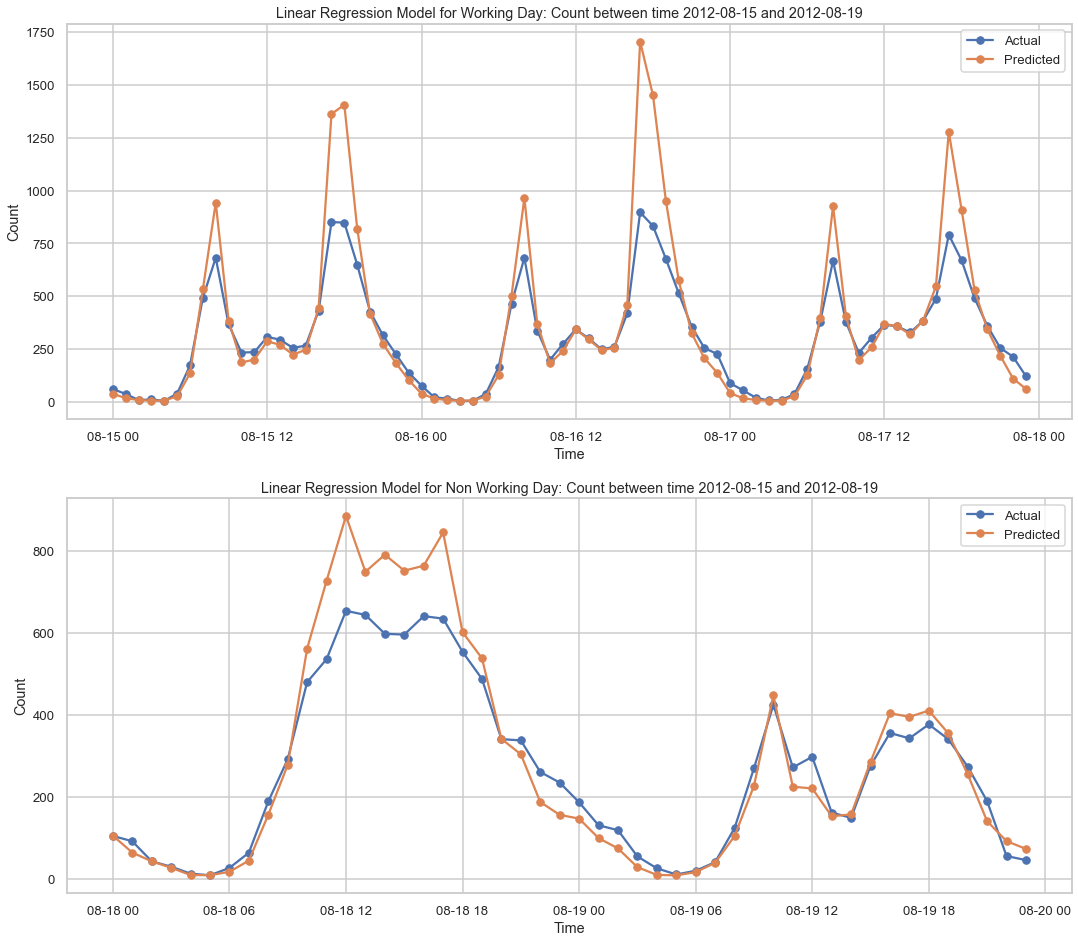

In [127]:
t_from, t_to = '2012-08-15', '2012-08-19'
ytest_w_predict, ytest_nw_predict = y_predict_summary[1], y_predict_summary[3]
ytest_w_predict = pd.Series(ytest_w_predict, index = ytest_w.index)
ytest_nw_predict = pd.Series(ytest_nw_predict, index = ytest_nw.index)

plot_true_vs_pred(ytest_w, ytest_nw, ytest_w_predict, ytest_nw_predict, 'Linear Regression', t_from, t_to) 

In [128]:
df_coeff = pd.DataFrame({'features': X_w.columns, 'Lin_Coeff_Working': lreg_w.coef_, 'Lin_Coeff_Non_Working': lreg_nw.coef_}) 

In [129]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge_w = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
ridge_w.fit(X_w, logy_w)
print('Best alpha for Working Day Ridge Regression Model: {}'.format(ridge_w.best_params_))
ridge_nw = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
ridge_nw.fit(X_nw, logy_nw)
print('Best alpha for Non Working Day Ridge Regression Model: {}'.format(ridge_nw.best_params_)) 

Best alpha for Working Day Ridge Regression Model: {'alpha': 20}
Best alpha for Non Working Day Ridge Regression Model: {'alpha': 5}


In [130]:
param_summary = [ridge_w.best_params_, ridge_nw.best_params_,'']

rmsle_summary, y_predict_summary = model_fit(ridge_w, X_w, Xtest_w, y_w, ytest_w, ridge_nw, X_nw, Xtest_nw, y_nw, ytest_nw)
ypred_test.loc[Xtest.workingday==1,'Ridge'], ypred_test.loc[Xtest.workingday==0,'Ridge'] = y_predict_summary[1], y_predict_summary[3]

In [131]:
rmsle_val_summary, y_predict_val_summary = cross_val(ridge_w, X_w, y_w, ridge_nw, X_nw, y_nw)
ypred_train.loc[X.workingday==1,'Ridge'], ypred_train.loc[X.workingday==0,'Ridge'] = y_predict_val_summary[0], y_predict_val_summary[1]

algo_score.loc['Ridge Regression'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Ridge Regression']] 

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Ridge Regression,0.348921,0.350308,0.349356,0.318817,0.380429,0.340706,0.356082,0.370332,0.360602,{'alpha': 20},{'alpha': 5},


In [134]:
algo_score.loc['Linear Regression', 'Training+Test Time (sec)'] 

0.197

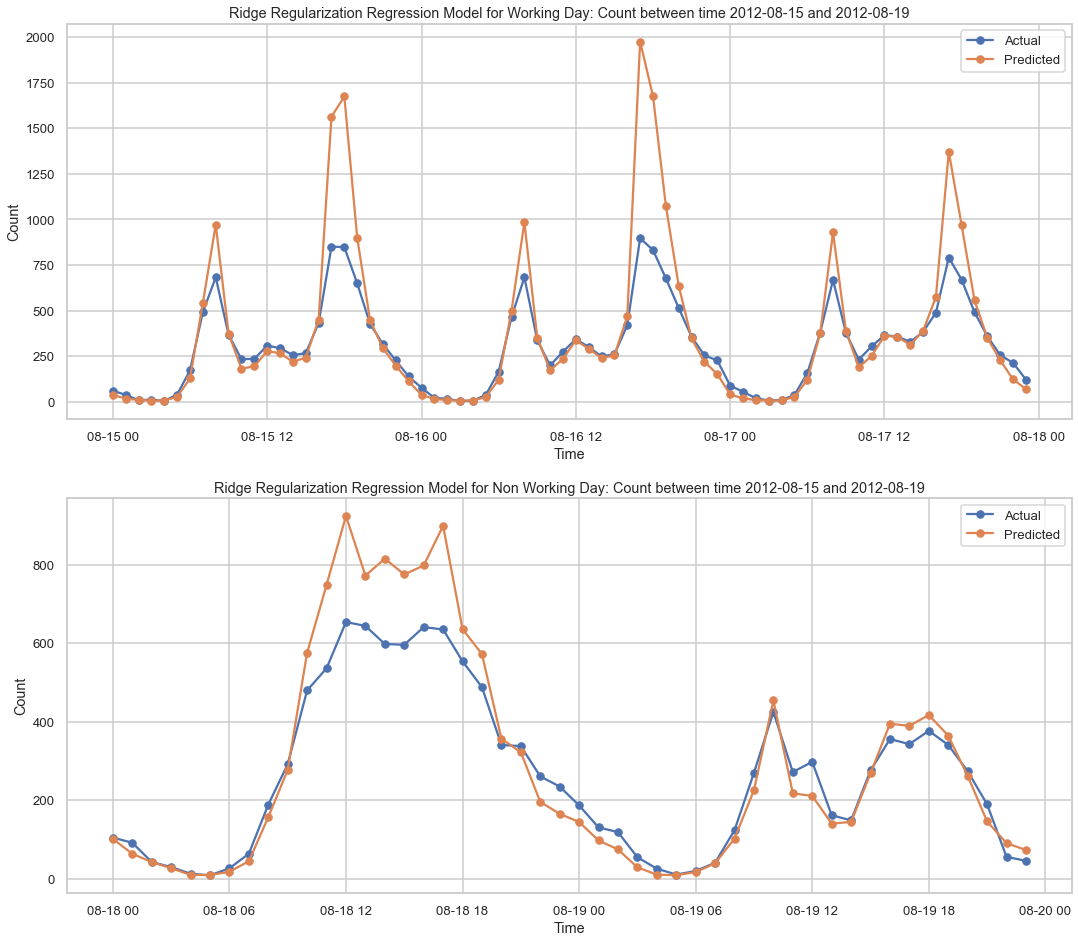

In [135]:
t_from, t_to = '2012-08-15', '2012-08-19'
ytest_w_predict, ytest_nw_predict = y_predict_summary[1], y_predict_summary[3]
ytest_w_predict = pd.Series(ytest_w_predict, index = ytest_w.index)
ytest_nw_predict = pd.Series(ytest_nw_predict, index = ytest_nw.index)

plot_true_vs_pred(ytest_w, ytest_nw, ytest_w_predict, ytest_nw_predict, 'Ridge Regularization Regression', t_from, t_to)

In [136]:
df_coeff['Ridge_Coeff_Working'] = ridge_w.best_estimator_.coef_
df_coeff['Ridge_Coeff_Non_Working'] = ridge_nw.best_estimator_.coef_ 

In [137]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso_w = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
lasso_w.fit(X_w, logy_w)
print('Best alpha for Working Day Lasso Regression Model: {}'.format(lasso_w.best_params_))

lasso_nw = GridSearchCV(Lasso(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
lasso_nw.fit(X_nw, logy_nw)
print('Best alpha for Non Working Day Lasso Regression Model: {}'.format(lasso_nw.best_params_)) 

Best alpha for Working Day Lasso Regression Model: {'alpha': 0.1}
Best alpha for Non Working Day Lasso Regression Model: {'alpha': 0.1}


In [138]:
param_summary = [lasso_w.best_params_, lasso_nw.best_params_,'']

rmsle_summary, y_predict_summary = model_fit(lasso_w, X_w, Xtest_w, y_w, ytest_w, lasso_nw, X_nw, Xtest_nw, y_nw, ytest_nw)
ypred_test.loc[Xtest.workingday==1,'Lasso'], ypred_test.loc[Xtest.workingday==0,'Lasso'] = y_predict_summary[1], y_predict_summary[3]

In [139]:
rmsle_val_summary, y_predict_val_summary = cross_val(lasso_w, X_w, y_w, lasso_nw, X_nw, y_nw)
ypred_train.loc[X.workingday==1,'Lasso'], ypred_train.loc[X.workingday==0,'Lasso'] = y_predict_val_summary[0], y_predict_val_summary[1]

algo_score.loc['Lasso Regression'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Lasso Regression']]

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Lasso Regression,0.735972,0.602078,0.696846,0.703214,0.618712,0.676077,0.737587,0.605711,0.699001,{'alpha': 0.1},{'alpha': 0.1},


In [141]:
algo_score.loc['Lasso Regression', 'Training+Test Time (sec)']


1.3

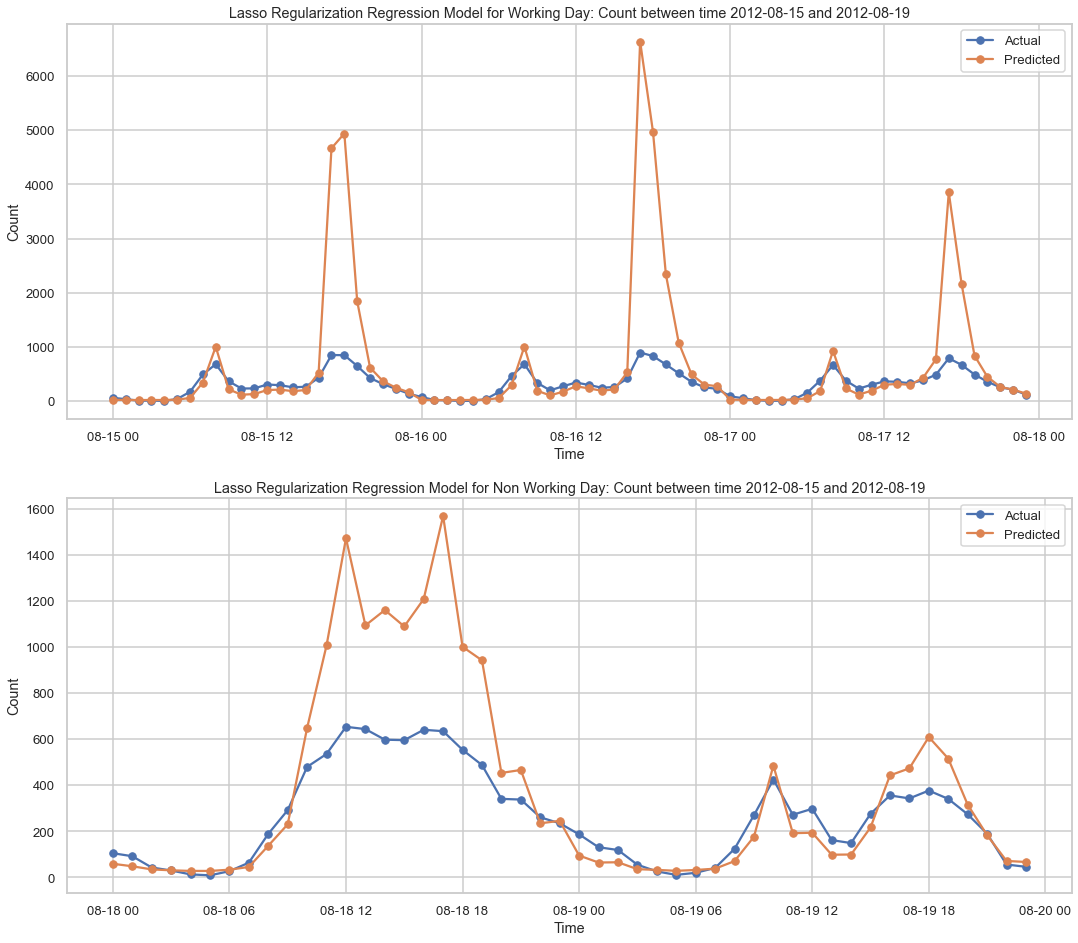

In [142]:
t_from, t_to = '2012-08-15', '2012-08-19'
ytest_w_predict, ytest_nw_predict = y_predict_summary[1], y_predict_summary[3]
ytest_w_predict = pd.Series(ytest_w_predict, index = ytest_w.index)
ytest_nw_predict = pd.Series(ytest_nw_predict, index = ytest_nw.index)

plot_true_vs_pred(ytest_w, ytest_nw, ytest_w_predict, ytest_nw_predict, 'Lasso Regularization Regression', t_from, t_to)

#Prediction Plot for Test data in a month (last 5 days of a month) 

In [145]:
df_coeff['Lasso_Coeff_Working'] = lasso_w.best_estimator_.coef_
df_coeff['Lasso_Coeff_Non_Working'] = lasso_nw.best_estimator_.coef_ 

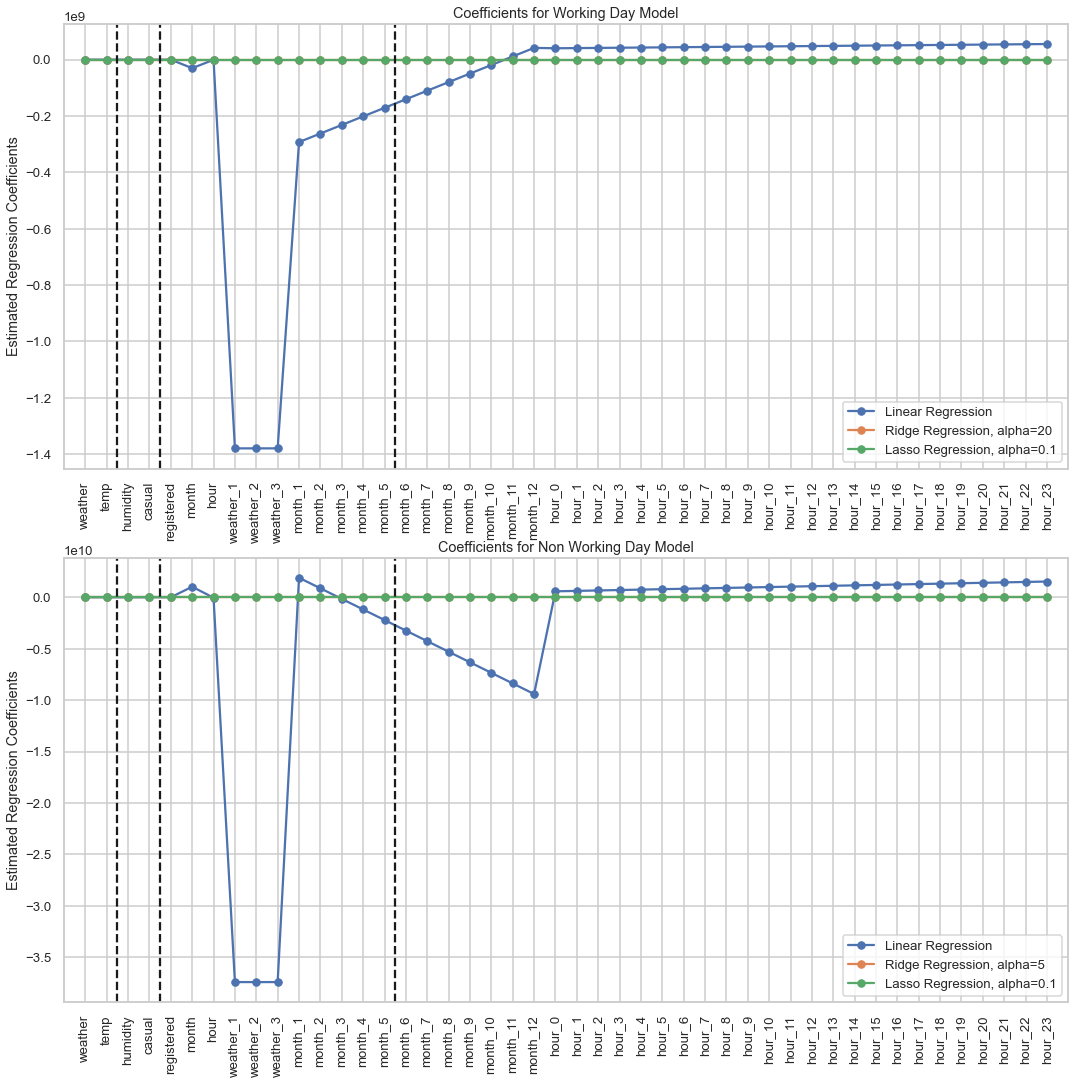

In [150]:
# Plotting the feature coefficients for Linear, Ridge and Lasso Regression Models
fig = plt.figure(figsize=(18, 18))
    
# Working day plot
axes = fig.add_subplot(2, 1, 1)
axes.plot(df_coeff.Lin_Coeff_Working, label='Linear Regression', marker='.', markersize=15)
axes.plot(df_coeff.Ridge_Coeff_Working, label='Ridge Regression, alpha={}'.format(ridge_w.best_params_['alpha']), marker='.', markersize=15)
axes.plot(df_coeff.Lasso_Coeff_Working, label='Lasso Regression, alpha={}'.format(lasso_w.best_params_['alpha']), marker='.', markersize=15)
axes.axvline(2-0.5, c='k', ls='--')
axes.axvline(4-0.5,  c='k', ls='--')
axes.axvline(15-0.5,  c='k', ls='--')
plt.xticks(range(len(df_coeff.Lin_Coeff_Working)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for Working Day Model')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff_Working)])
axes.legend()

axes = fig.add_subplot(2, 1, 2)
axes.plot(df_coeff.Lin_Coeff_Non_Working, label='Linear Regression', marker='.', markersize=15)
axes.plot(df_coeff.Ridge_Coeff_Non_Working, label='Ridge Regression, alpha={}'.format(ridge_nw.best_params_['alpha']), marker='.', markersize=15)
axes.plot(df_coeff.Lasso_Coeff_Non_Working, label='Lasso Regression, alpha={}'.format(lasso_nw.best_params_['alpha']), marker='.', markersize=15)
axes.axvline(2-0.5,  c='k', ls='--')
axes.axvline(4-0.5,  c='k', ls='--')
axes.axvline(15-0.5,  c='k', ls='--')
plt.xticks(range(len(df_coeff.Lin_Coeff_Working)), df_coeff.features, rotation=90)
axes.set(ylabel='Estimated Regression Coefficients', title='Coefficients for Non Working Day Model')
axes.set(xlim=[-1, len(df_coeff.Lin_Coeff_Working)])
axes.legend()

plt.show() 